# Exploratory Data Analysis (EDA)
## EV Survey 

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np
#------------------------
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
#-------------------------
from os import listdir
from os.path import isfile, join

import os 
from pathlib import Path

Objective
* Evaluate feature relationships
* Evaluate statistical relationship strengths using Pearson or other method

In [62]:
def seabornhist(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.histplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

def seaborncount(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.countplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

In [63]:
#collect info about current working directory and the location of the raw data pickle files

wd = Path(os.getcwd())
parent_dir = wd.parent.absolute()

In [64]:
#Data for the EV survey
filename = "ev_survey_wrangled_hasna.pkl"
filepath = f"{wd}\\{filename}"
ev_survey_wrangled_hasna = pd.read_pickle(filepath)

In [65]:
ev_survey_wrangled_hasna.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,5.0,5.0,5.0,5.0,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0
6,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,4.0,1.0,3.0,3.0,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0
9,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,3.0,1.0,2.0,1.0,i prefer not to answer,level 1,no charging,no charging,24.0,1.0
10,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,5.0,2.0,3.0,3.0,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0
11,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,5.0,2.0,4.0,2.0,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0


In [66]:
# Make a pairplot of the ev survey data
#sns.pairplot(ev_survey_wrangled_hasna, kind='scatter')

In [67]:
# It's clear that this approach to build a pairplot will not be useful as the dataset
# is comprised primarily of categorical variables

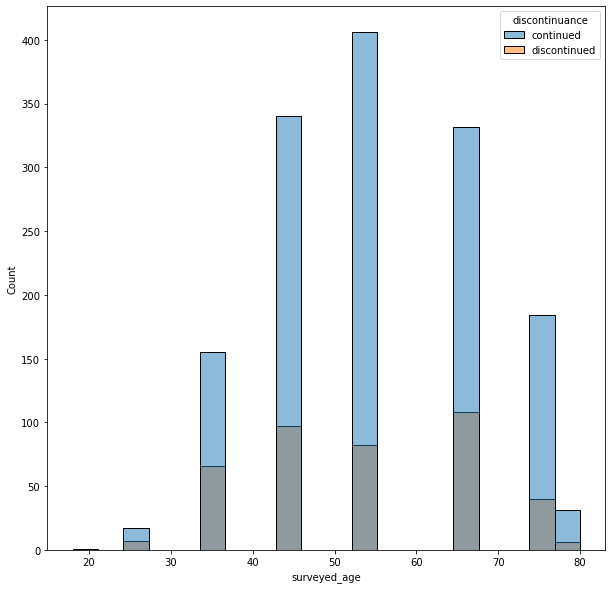

In [68]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c='discontinuance', x='surveyed_age')
plt.show()



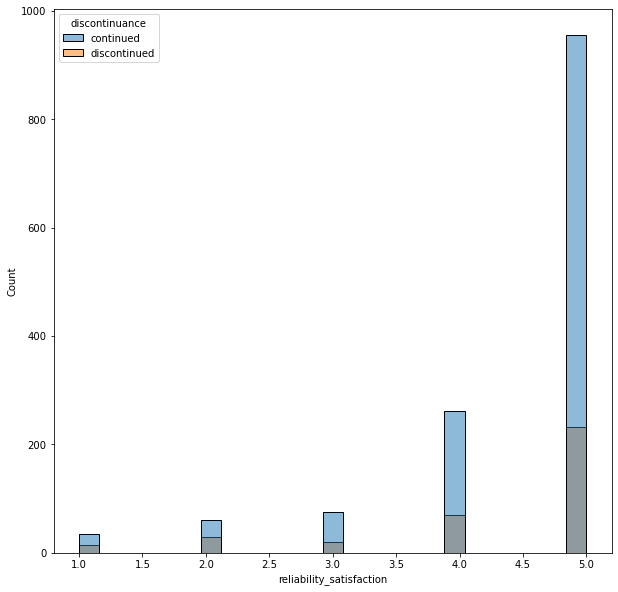

In [69]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c='discontinuance', x='reliability_satisfaction')
plt.show()

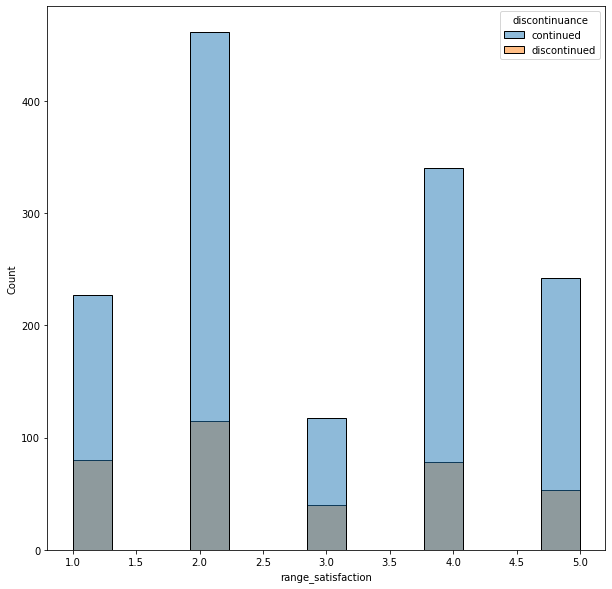

In [70]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c='discontinuance', x='range_satisfaction')
plt.show()

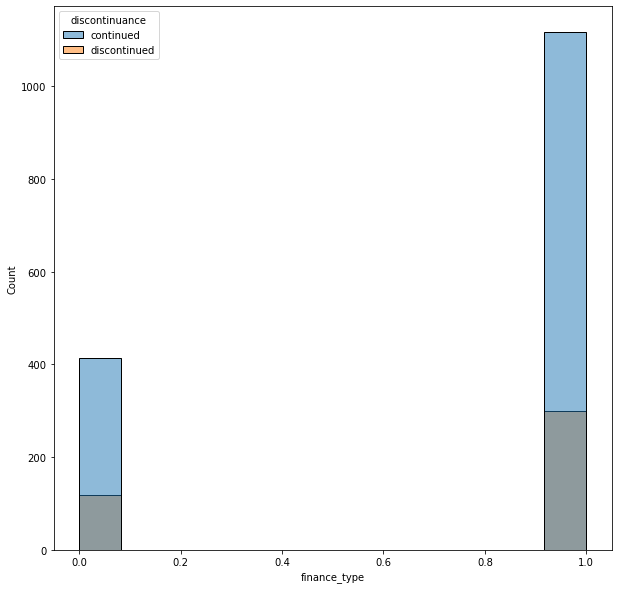

In [71]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c='discontinuance', x='finance_type')
plt.show()

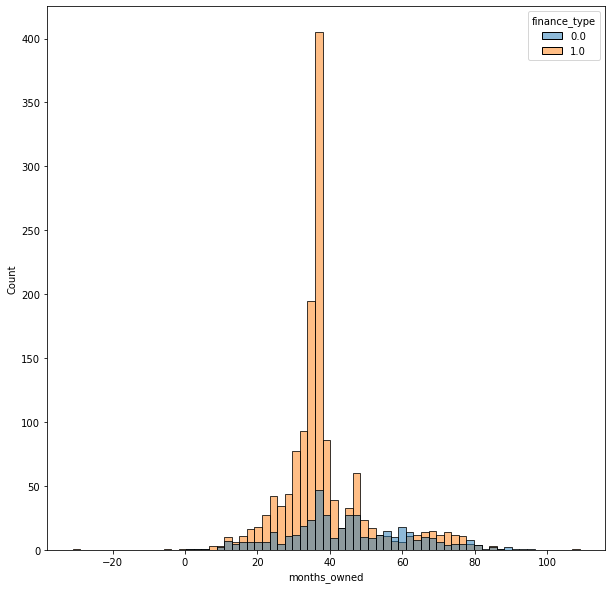

In [72]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c='finance_type', x='months_owned')
plt.show()

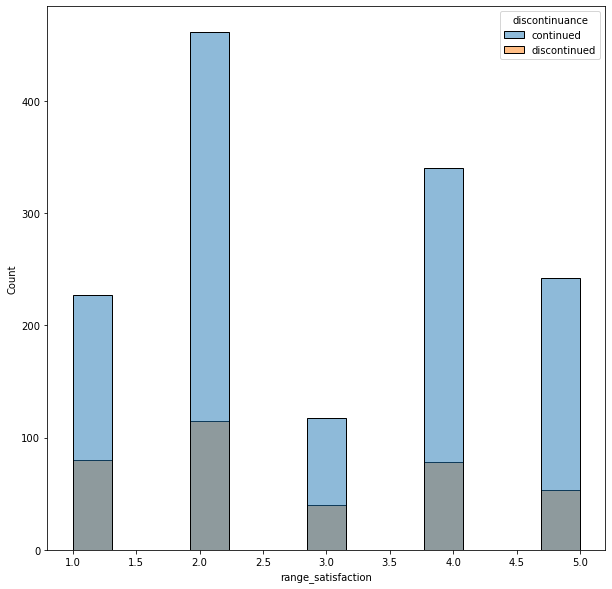

In [73]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c ='discontinuance', x='range_satisfaction')
plt.show()

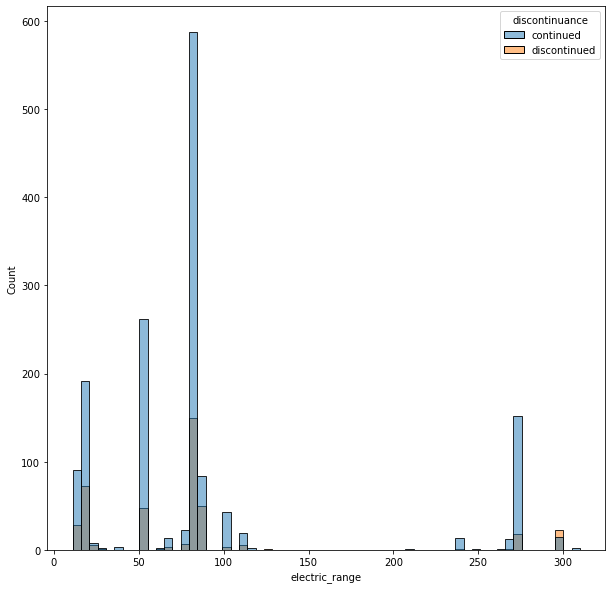

In [74]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c ='discontinuance', x='electric_range')
plt.show()

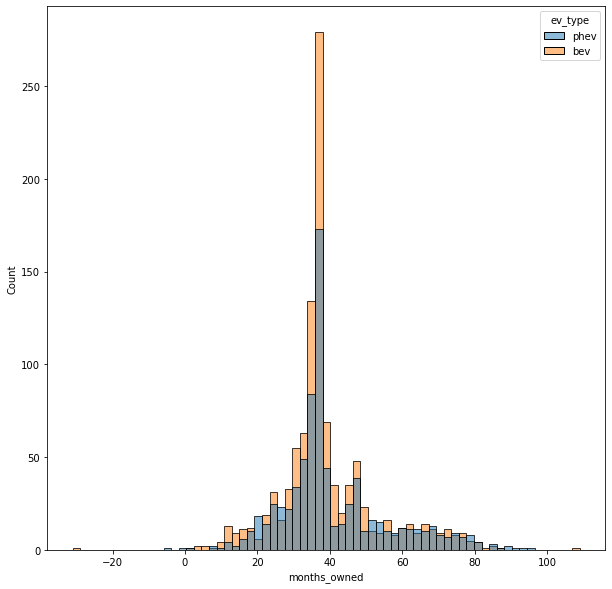

In [75]:
seabornhist(size=(10,10), data=ev_survey_wrangled_hasna, hue_c = 'ev_type', x='months_owned')

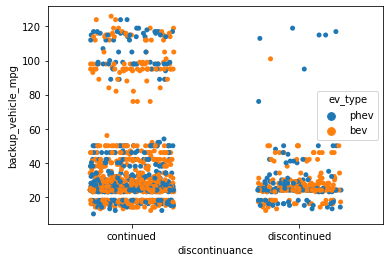

In [76]:

ax = sns.stripplot(data=ev_survey_wrangled_hasna,
                  x='discontinuance',
                  y='backup_vehicle_mpg',
                  hue='ev_type',
                  jitter=0.25)

The results of this plot align if one takes the assumption that the users who discontinue use of an EV will probably not have an EV as a backup vehicle, so seeing more modest mpg ratings is not surprising. 

In [77]:
ev_survey_wrangled_hasna.describe()

,response_id,year_submitted_survey_2,months_owned,electric_range,surveyed_age,dist_1,trips_greater_200,safety_satisfaction,comfort_satisfaction,refuel_recharge_satisfaction,performance_satisfaction,env_impact_satisfaction,purch_price_satisfaction,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,backup_vehicle_mpg,finance_type
count,1947.000000,1947.0,1851.000000,1946.000000,1872.000000,1615.000000,1947.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1587.000000,1947.000000
mean,2595.751926,2019.0,39.679633,89.323227,55.137821,19.769337,0.223934,4.463776,4.290930,4.576155,4.313748,4.661152,4.046777,4.435254,2.896178,3.948089,3.737022,34.643352,0.727273
std,1413.889852,0.0,14.374433,74.423045,12.908394,68.279562,2.731978,0.845330,0.968578,0.877836,1.014574,0.703353,1.101619,1.000828,1.389603,1.216392,1.177163,24.698563,0.445476
min,1.000000,2019.0,-31.000000,11.000000,18.000000,0.070000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,1376.000000,2019.0,33.000000,53.000000,45.000000,5.285000,0.000000,4.000000,4.000000,5.000000,4.000000,5.000000,3.000000,4.000000,2.000000,3.000000,3.000000,24.000000,0.000000
50%,2724.000000,2019.0,36.000000,84.000000,55.000000,12.110000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,2.000000,4.000000,4.000000,24.000000,1.000000
75%,3744.500000,2019.0,46.000000,84.000000,65.000000,22.085000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,34.000000,1.000000
max,5022.000000,2019.0,109.000000,310.000000,80.000000,1992.600000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,126.000000,1.000000


Interesting notes:
* The months owned has negative values in it which doesn't make sense. ownership cannot be negative.
* There is a vehicle with an electric range noted as 11, take a look at that one and see what vehicle it is. 
* There is a 1 way distance of 0.07 miles, very short. look into this entry more closely.
* There is a 1 way distance of 1992 miles, look into this more closely.




In [78]:
a  =(ev_survey_wrangled_hasna.loc[ev_survey_wrangled_hasna.months_owned.isnull()])
a.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
30,30.0,2019.0,NaN,2011,nissan,leaf,84.0,bev,continued,65.0,...,5.0,4.0,5.0,2.0,"$150,000 to $199,999",no charging,NaN,NaN,NaN,0.0
108,113.0,2019.0,NaN,2012,mitsubishi,i-miev,62.0,bev,discontinued,55.0,...,5.0,1.0,1.0,4.0,"$100,000 to $149,999",no charging,NaN,NaN,NaN,0.0
175,180.0,2019.0,NaN,2016,toyota,mirai,300.0,NaN,continued,55.0,...,5.0,2.0,2.0,5.0,"$250,000 to $299,999",no charging,NaN,NaN,NaN,0.0
238,245.0,2019.0,NaN,2015,hyundai,tucson,300.0,NaN,discontinued,35.0,...,4.0,4.0,1.0,2.0,"$250,000 to $299,999",no charging,NaN,NaN,NaN,0.0
246,254.0,2019.0,NaN,2013,ford,c-max energi,20.0,phev,continued,NaN,...,NaN,NaN,NaN,NaN,NaN,no charging,NaN,NaN,NaN,0.0


In [79]:
#a  =(ev_survey_wrangled_hasna.loc[ev_survey_wrangled_hasna.months_owned.isnull()].index)

#example if you want to drop rows with a certain value in a column
#idx = ev_survey_wrangled_hasna[ev_survey_wrangled_hasna.months_owned
#                            <=0].index
#ev_survey_wrangled_hasna.drop(index=idx, inplace = True)


## Update the data associated with the interesting findings above

### Create a dataframe "df" that will be the final output from EDA with the cleaned data

In [80]:
df = ev_survey_wrangled_hasna

### Months of Ownership

Turn the data that was negative to a positive value for months_owned as ownership cannot be positive.

In [81]:
#df = df.months_owned.apply(l)
df.months_owned = df.months_owned.apply(lambda x: x*-1 if x<0 else x)
df.months_owned.describe()

count    1851.000000
mean       39.718531
std        14.266543
min         0.000000
25%        33.000000
50%        36.000000
75%        46.000000
max       109.000000
Name: months_owned, dtype: float64

## Investigate the vehicles with small EV_range values.

In [82]:
a  = df.loc[ev_survey_wrangled_hasna.electric_range < 50]
a.ev_type.value_counts()


phev    401
Name: ev_type, dtype: int64

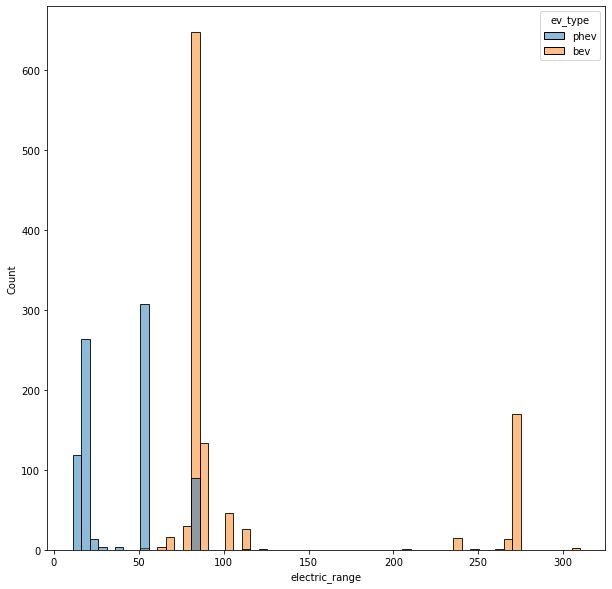

bev     1109
phev     799
Name: ev_type, dtype: int64


In [83]:
seabornhist(size=(10,10), data=df, hue_c ='ev_type', x='electric_range')
plt.show()
print(df.ev_type.value_counts())

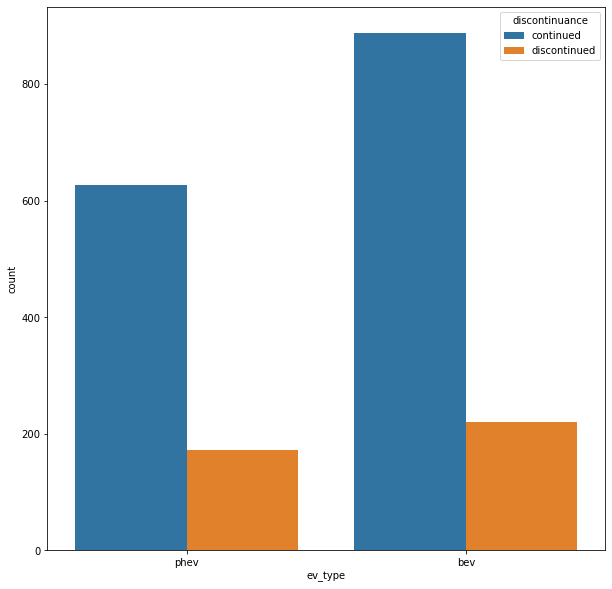

In [84]:
seaborncount(size=(10,10), data=df, hue_c ='discontinuance', x='ev_type')
plt.show()

The low ev_range vehicles are all PHEV (Hybrid vehicles) so the low values are explainable. 
The ratio of continuance to discontinuance is also similar for BEV and PHEV.

## Remove the vehicles with the ev_range missing

In this case, the only one missing is the "Zero", which is a motorcycle and will be removed

In [85]:
nan_ev_type = df.loc[df.electric_range.isnull()]
nan_ev_type.head()
#To-Do: Drop the record

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
1917,1988.0,2019.0,38.0,2014,zero,ds 11.4 kwh battery,NaN,bev,continued,55.0,...,5.0,4.0,2.0,3.0,"$150,000 to $199,999",level 1,level 1,level 1,95.0,0.0


## What's going on with the very short one way trips? Anything we can learn?

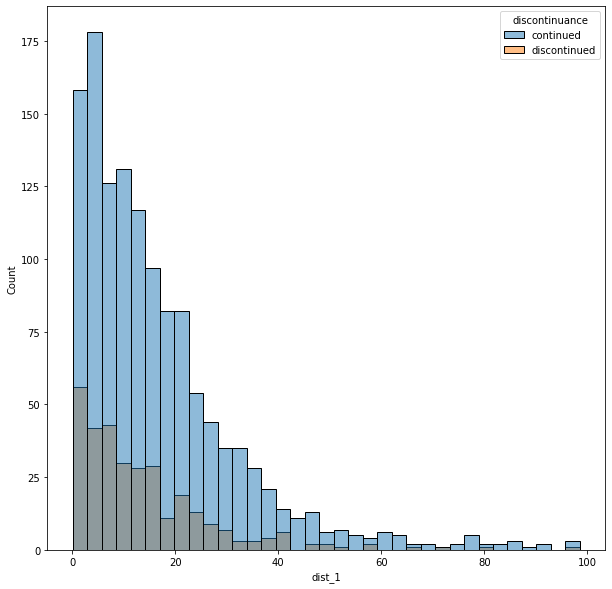

In [86]:
short_trips = df.loc[df.dist_1 < 100]
seabornhist(size= (10,10), data= short_trips, hue_c='discontinuance', x='dist_1' )

Interestingly, the people who decide to continue EV ownership and commute over short distances for work are greater than those who discontinue.

In [87]:
df.loc[((df.ev_type.isnull()) & (df.electric_range == 300.0)),'ev_type'] = 'hyd'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 4833
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   1947 non-null   float64
 1   year_submitted_survey_2       1947 non-null   float64
 2   months_owned                  1851 non-null   float64
 3   model_year                    1947 non-null   object 
 4   Make                          1947 non-null   object 
 5   Model                         1947 non-null   object 
 6   electric_range                1946 non-null   float64
 7   ev_type                       1946 non-null   object 
 8   discontinuance                1947 non-null   object 
 9   surveyed_age                  1872 non-null   float64
 10  surveyed_gender               1899 non-null   object 
 11  dist_1                        1615 non-null   float64
 12  trips_greater_200             1947 non-null   float64
 13  saf

### What about outliers?

It turns out there are 2 people in the survey who noted a commute distance > 1500 miles. One is a Cherolet Volt Hybrid and the second is a Tesla Model S.

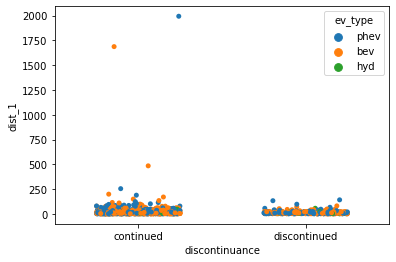

In [88]:
ax = sns.stripplot(data=df,
                  x='discontinuance',
                  y='dist_1',
                  hue='ev_type',
                  jitter=0.25)

In [89]:
df.to_pickle("EDA_cleaned_data.pkl")

In [90]:
raw_output = pd.read_pickle("EDA_cleaned_data.pkl")

In [91]:
raw_output.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,5.0,5.0,5.0,5.0,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0
6,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,4.0,1.0,3.0,3.0,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0
9,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,3.0,1.0,2.0,1.0,i prefer not to answer,level 1,no charging,no charging,24.0,1.0
10,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,5.0,2.0,3.0,3.0,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0
11,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,5.0,2.0,4.0,2.0,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0
